# 1. Diabetes Dataset 
# IMBALANCE PROPERTIES: MILD

diabetes_binary_health_indicators_BRFSS2015 Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Importance](#FI)
3. [Feature Normalization](#FE)
4. [Sampling Techniques](#ST)
5. [Modelling](#Mo)
6. [Model Evaluation](#MOE)
7. [Results](#RS)
    1. [Support Vector Machine (SVM)](#SVM)
    2. [Decision Tree (DT)](#DT)
    3. [Gaussian Naïve Bayes (GNB)](#GNB)
    4. [K-Nearest Neighbourhood (KNN)](#KNN)
    5. [Logistic Regression (LR)](#LR)

---

<a id="EDA"></a>
# 1. Exploratory Data Analysis

## Load and Clean Dataset

In [2]:
path = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/external/'

In [3]:
data = pd.read_csv(path+'diabetes.csv', sep=',', encoding='utf-8')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
118590,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,5.0,7.0
85195,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,0.0,0.0,0.0,9.0,6.0,7.0
179146,0.0,1.0,1.0,1.0,25.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,5.0,7.0
29516,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,1.0,8.0,6.0,8.0
27949,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,7.0


In [5]:
data.tail(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
#Descriptive or summary statistics of numeric columns
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
#Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
#Returns the dimensions of the array
#Rows & Columns
data.shape

(253680, 22)

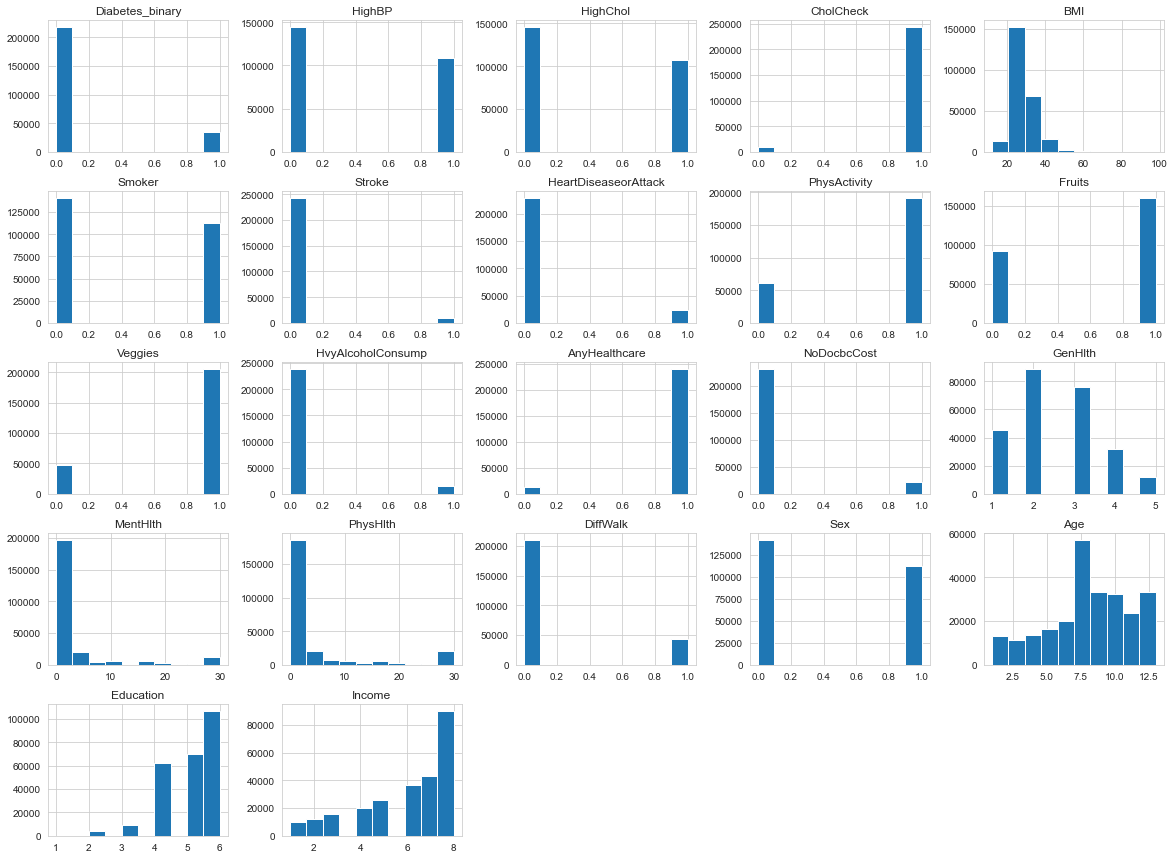

In [10]:
#Representation of the distribution of data
data.hist(figsize=[20,15]);

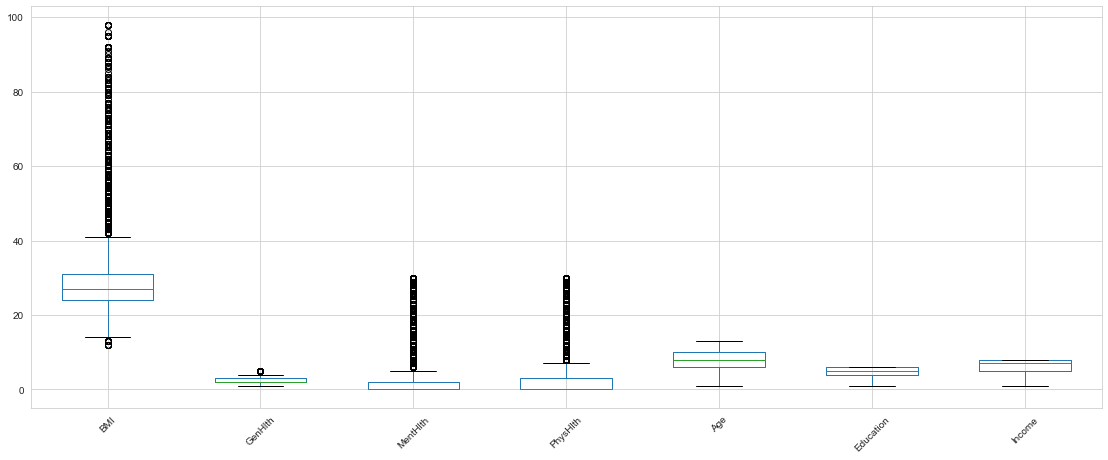

In [11]:
plt.rcParams["figure.figsize"] = [15.50, 6.50]
plt.rcParams["figure.autolayout"] = True
data.boxplot(['BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income'], widths = 0.6, rot=45);

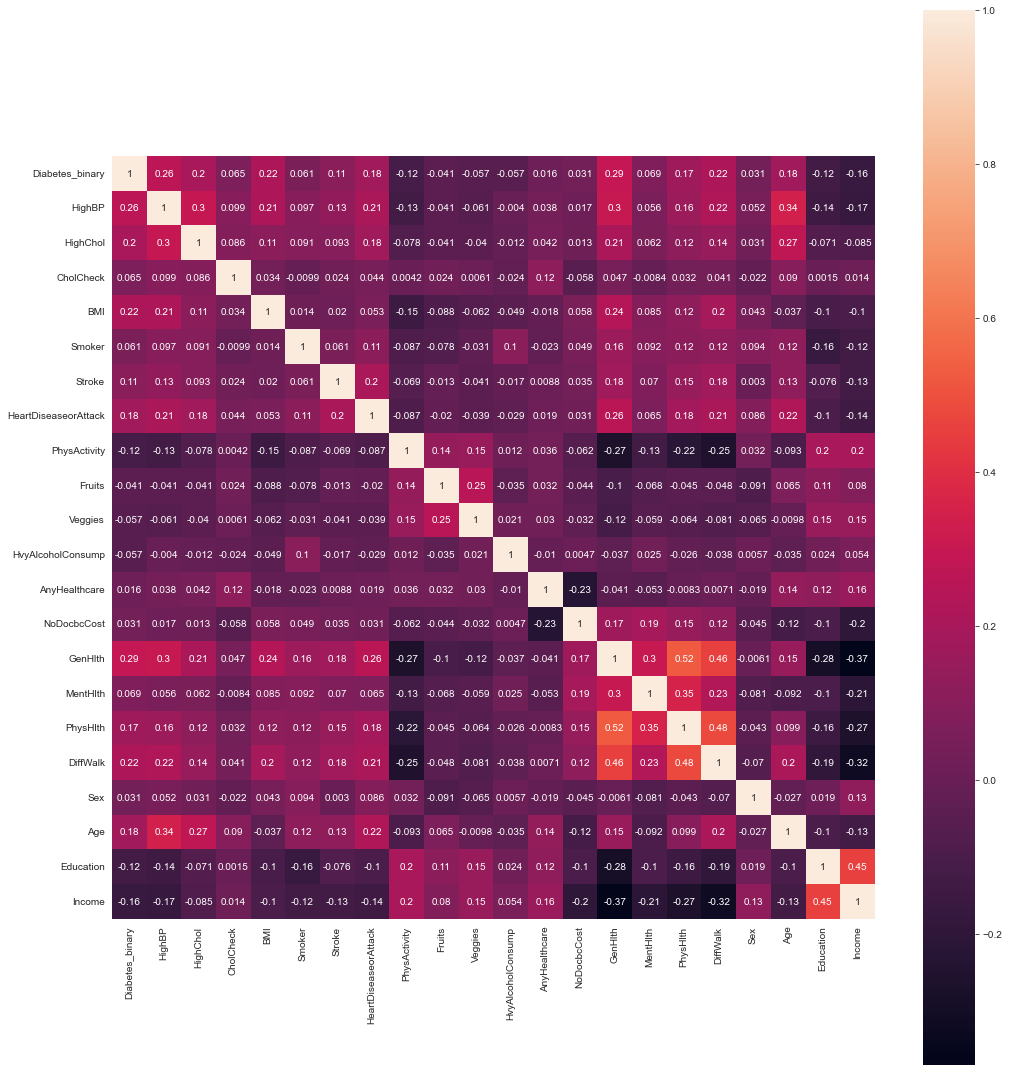

In [12]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corrMatrix, square=True, annot=True, ax=ax)
plt.show()

In [13]:
#Percentage of NAN Values
data.isna().mean().round(4) * 100

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [14]:
#Number of NAN Values
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Label

In [15]:
data['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [16]:
a = data[data['Diabetes_binary'] == 1.0]
print(a.shape)
n = 4800
a = a.iloc[:n]
print(a.shape)

(35346, 22)
(4800, 22)


In [17]:
b = data[data['Diabetes_binary'] == 0.0]
print(b.shape)
n = 25200
b = b.iloc[:n]
print(b.shape)

(218334, 22)
(25200, 22)


In [18]:
data = pd.concat([a,b])
data.shape

(30000, 22)

In [19]:
all_columns = list(data) # Creates list of all column headers
data[all_columns] = data[all_columns].astype(int)

In [20]:
print('Percentage of Imbalance Property: {:.2f}%'.format((data['Diabetes_binary'].value_counts()[1] * 100 / data['Diabetes_binary'].value_counts()[0])))

Percentage of Imbalance Property: 19.05%


Text(0.5, 1.0, 'Number of observations per class')

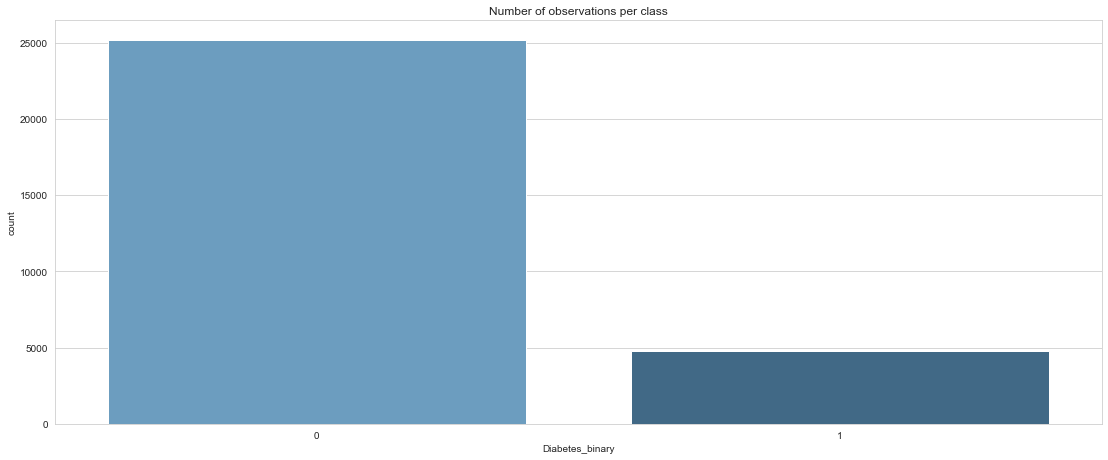

In [21]:
ax = sns.countplot(x="Diabetes_binary", data=data, palette="Blues_d");
ax.set_title('Number of observations per class')

---

<a id="FI"></a>
# 2. Feature Importance

## Diabetes classification with LightGBM - SHAP

In [22]:
# !conda install lightgbm -y -U
# !pip install shap

In [23]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Light GBM is a gradient boosting framework that uses tree based learning algorithm
import shap

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [24]:
X_ = data.drop('Diabetes_binary', axis=1)
y_ = data['Diabetes_binary']

# create a train/test split
train_x, test_x, train_y, test_y = train_test_split(X_,y_, test_size = 0.2,random_state=7)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(24000, 21) (24000,)
(6000, 21) (6000,)


In [25]:
d_train = lgb.Dataset(train_x, label=train_y)
d_test = lgb.Dataset(test_x, label=test_y)

### Train the model

In [26]:
%%time
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[210]	valid_0's binary_logloss: 0.3246
CPU times: user 7.61 s, sys: 749 ms, total: 8.35 s
Wall time: 1.78 s


### Explain predictions

In [27]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


#### SHAP Summary Plot

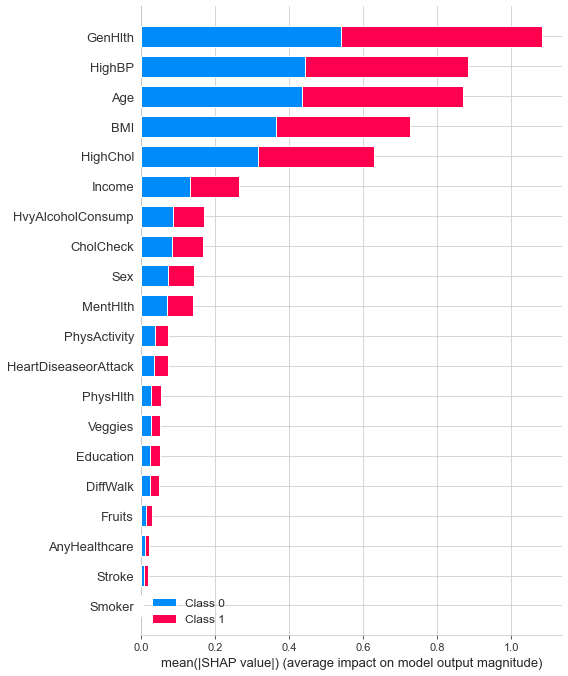

In [28]:
shap.summary_plot(shap_values, X_)

---

<a id="FE"></a>
# 3. Feature Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [30]:
# separate the columns into target and predictors 
X = data.drop('Diabetes_binary', axis=1).values
y = data['Diabetes_binary']

In [31]:
# split the dataset into a training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=13)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (24000, 21) (24000,)
Test: (6000, 21) (6000,)


In [32]:
# perform a robust scaler transform of the dataset
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

---

<a id="ST"></a>
# 4. Sampling Techniques

In [33]:
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, InstanceHardnessThreshold, TomekLinks, CondensedNearestNeighbour, AllKNN
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.combine import SMOTEENN, SMOTETomek 
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier

In [34]:
def evaluate_classificationmodel(X_train, X_test, y_train, y_test, model):
    """  
    Evaluation of a trained binary probabilistic classification model
   
    Args:
        X_train, X_test, y_train, y_test
        model: binary classification supervised model
    
    Return: dict
        results: {
            accuracy
            precision, recall, fscore 
            n_occurrences
            predictions_count
            tp - true positive
            tn - true negative
            fp - false positive
            fn - false negative
            auc - area under the curve
            }
    """
    # model fitting
    model.fit(X_train, y_train)
    # prediction for the evaluation set
    predictions = model.predict(X_test)
    # accuracy
    accuracy = metrics.accuracy_score(y_test, predictions)   
    # precision, recall and f1 score
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    # confusion matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()    
    # fpr and tpr values for various thresholds 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label = 1) 
    # area under the curve
    auc_ = metrics.auc(fpr, tpr)    
    # gather results
    result = {'accuracy': accuracy,
              'precision':precision,
              'recall':recall,
              'fscore':fscore, 
              'n_occurences':support,
              'predictions_count': Counter(predictions),
              'tp':tp, 
              'tn':tn, 
              'fp':fp,
              'fn':fn, 
              'auc':auc_}
    
    return result

In [35]:
def resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model):
    """    
    Args:
        X_train, X_test, y_train, y_test: test and train split data samples
        model: a trained binary probabilistic classification model
    
    Return: dict
        results: OverSampling, UnderSampling and Hybrid techniques
    """
   
    results = {'ordinary':{},
               'class_weight':{},
               'oversample':{},
               'undersample':{},
               'hybrid':{}}
    
    # ------- Ordinary ----------
    results['ordinary'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
    
    # ------- Class weight -------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        results['class_weight'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
        
    # ------ OverSampling techniques -----
    print('   Oversampling methods:')
    techniques = [RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[1,2]), BorderlineSMOTE(), SVMSMOTE(), 
                  KMeansSMOTE(cluster_balance_threshold=0.01), ADASYN()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['oversample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ UnderSampling techniques --------
    print('   Undersampling methods:')
    techniques = [RandomUnderSampler(), ClusterCentroids(), NearMiss(), InstanceHardnessThreshold(), TomekLinks(), CondensedNearestNeighbour(), AllKNN(),
                  EditedNearestNeighbours(), RepeatedEditedNearestNeighbours(), OneSidedSelection(), NeighbourhoodCleaningRule()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['undersample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ Hybrid techniques --------
    print(   'Hybrid methods:')
    techniques = [SMOTEENN(), SMOTETomek()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['hybrid'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # # ------ Ensemble techniques --------
    # print('-------- Ensemble methods ---------')
    # techniques = [EasyEnsembleClassifier(), RUSBoostClassifier(), BalancedBaggingClassifier(), BalancedRandomForestClassifier()]
    # for sampler in techniques:
    #     technique = sampler.__class__.__name__
    #     print(f'Technique:{technique}')
    #     print(f'Before resampling: {sorted(Counter(y_train).items())}')
    #     X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    #     print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
    #     results['ensemble'][technique] = evaluate_model(X_resampled, X_test, y_resampled, y_test, model)
    
    return results

---

<a id="Mo"></a>
# 5. Modelling

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

---

<a id="MOE"></a>
# 6. Model Evaluation

In [37]:
def evaluate_resamplingmethod(results, method, metrics = ['precision', 'recall', 'fscore']):
    """
    Evaluation of resampling techniques pipeline of the trained binary probabilistic classification model    
    
    Args:
        results: Model evaluation outputs
        method: oversample, undersample, hybrid
        metrics: precision, recall, fscore
    
    Return:
        None
    """
    
    fig, ax = plt.subplots(1, 3, sharey = True, figsize=(20,6)) 
    
    for i, metric in enumerate(metrics):
        ax[i].axhline(results['ordinary'][metric][0], label = 'No Resampling')
        if results['class_weight']:
            ax[i].bar(0, results['class_weight'][metric][0], label = 'Adjust Class Weight')
        ax[0].legend()
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i].bar(j+1, result[metric][0], label = technique)
        ax[i].set_title(f'Diabetes:\n{metric}')

In [38]:
def metrics_dataframe(results):
    """
    Creates a dataframe from the results obtained in the evaluation of the models
    
    Args:
        results: Model evaluation outputs
    
    Return:
        df
    """
    
    # ordinary results
    ordinary = results.get('ordinary', {})
    df_ordinary = pd.DataFrame.from_dict(ordinary, orient='index').T
    df_ordinary.insert(0, 'method','ordinary')
    
    #class weight results
    class_weight = results.get('class_weight',{})
    df_classweight = pd.DataFrame.from_dict(class_weight, orient='index').T
    df_classweight.insert(0, 'method','class_weight')
    
    # sampling techniques results
    sampling = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in results.items()}, axis=0)
    sampling = sampling.drop(0, axis=1)
    sampling = sampling.dropna(how='all')
    sampling = sampling.droplevel(0, axis=0)
    sampling.index.name = 'method'
    sampling = sampling.reset_index()
    
    #concat dataframes
    output = pd.concat([df_ordinary, df_classweight], ignore_index=True)
    results = pd.concat([output, sampling], ignore_index=True)
    
    return results

---

<a id="RS"></a>
# 7. Results

<a id="SVM"></a>
## Support Vector Machine (SVM)

In [ ]:
%%time
model_svc = SVC()
results_svc = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_svc)

In [ ]:
evaluate_resamplingmethod(results_svc, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'hybrid')

In [ ]:
svc = metrics_dataframe(results_svc)
svc.to_html('svc_results_diabetes.html')

<a id="DT"></a>

## Decision Tree (DT)

In [ ]:
%%time
model_tree = DecisionTreeClassifier()
results_tree = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_tree)

In [ ]:
evaluate_resamplingmethod(results_tree, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'hybrid')

In [ ]:
tree = metrics_dataframe(results_tree)
tree.to_html('tree_results_diabetes.html')

<a id="GNB"></a>
## Gaussian Naïve Bayes (GNB)

In [ ]:
%%time
model_gnb = GaussianNB()
results_gnb = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_gnb)

In [ ]:
evaluate_resamplingmethod(results_gnb, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'hybrid')

In [ ]:
gnb = metrics_dataframe(results_gnb)
gnb.to_html('gnb_results_diabetes.html')

<a id="KNN"></a>
## K-Nearest Neighbourhood (KNN)

In [ ]:
%%time
model_knn = KNeighborsClassifier()
results_knn = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_knn)

In [ ]:
evaluate_resamplingmethod(results_knn, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'hybrid')

In [ ]:
knn = metrics_dataframe(results_knn)
knn.to_html('knn_results_diabetes.html')

<a id="LR"></a>
## Logistic Regression (LR)

In [ ]:
%%time
model_lr = LogisticRegression()
results_lr = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_lr)

In [ ]:
evaluate_resamplingmethod(results_lr, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_lr, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_lr, 'hybrid')

In [ ]:
lr = metrics_dataframe(results_lr)
lr.to_html('lr_results_diabtes.html')